# Binary Classifier
-------

In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, losses, metrics, optimizers, regularizers
from sklearn.datasets import load_diabetes, load_iris, load_boston, load_breast_cancer, load_wine

In [72]:
cancer = load_breast_cancer()

In [73]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [74]:
pd.DataFrame(cancer.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
cancer.data.shape

(569, 30)

In [76]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [77]:
cancer.target.shape

(569,)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_data, test_data, train_targets, test_targets = train_test_split(cancer.data, cancer.target, test_size = 1/3)

In [80]:
train_data.shape

(379, 30)

In [81]:
train_data.shape[1]

30

In [82]:
test_data.shape

(190, 30)

In [83]:
train_targets.shape

(379,)

In [84]:
test_targets.shape

(190,)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc = StandardScaler()

In [87]:
train_data = sc.fit_transform(train_data)
test_data = sc.fit_transform(test_data)

In [88]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.330360,-0.675288,-0.371486,-0.386949,-1.292211,-0.968026,-0.623426,-0.650979,0.085865,-0.877986,...,-0.485838,-0.585222,-0.477972,-0.489425,-1.018045,-0.644902,-0.432628,-0.469024,0.252100,-0.852907
1,3.913118,-0.159272,3.926867,5.179023,1.354631,0.977716,3.092181,2.956823,-0.607270,-1.084650,...,2.393228,-1.170116,2.372843,2.757801,-0.818216,-0.637971,0.324306,0.724877,-2.144168,-1.736488
2,1.534537,1.415299,1.460699,1.506930,0.517745,-0.073032,1.050624,1.126208,-0.549828,-1.279670,...,1.043729,0.899382,0.951667,0.913875,0.895865,-0.409950,0.733061,0.525249,-1.020917,-1.385290
3,0.239160,-0.376288,0.209362,0.067009,1.544833,0.558529,0.897441,1.009519,0.576038,-0.078986,...,0.459014,-0.679667,0.414714,0.144831,0.376312,-0.188859,0.405425,0.836298,0.931275,-0.730050
4,0.200075,-1.068328,0.120531,0.074308,-0.888223,-1.037560,-0.683775,-0.607387,-0.565146,-1.342251,...,-0.135818,-1.317582,-0.160177,-0.216428,-0.831538,-0.987973,-0.781861,-0.512354,-0.949517,-1.353645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.970601,-0.983933,0.945562,0.844662,0.157884,0.264503,0.169163,0.831162,-0.258788,-0.176496,...,0.754406,-0.996139,0.808674,0.582037,-0.316426,0.260252,-0.050737,0.509774,-0.214615,-0.251029
375,-0.877545,0.535179,-0.802659,-0.794866,2.001316,0.385689,0.243773,0.224059,0.338611,0.872829,...,-0.696254,1.625114,-0.582736,-0.637555,2.587744,0.181242,0.757292,0.460254,0.147612,0.795742
376,-0.098643,-0.294304,-0.144744,-0.194361,-1.289929,-0.767373,-0.754424,-0.929545,-1.277429,-1.004604,...,-0.190445,-0.509004,-0.291789,-0.275098,-1.577119,-0.424504,-0.537977,-0.811951,-0.921653,-0.812575
377,1.559663,0.614751,1.549935,1.515352,0.119844,0.626076,1.325297,1.649051,1.054723,-0.808128,...,1.308773,1.512444,1.471112,1.117425,-0.480729,0.707977,1.131808,1.746231,2.030145,-0.251650


In [89]:
train_targets = np.array(train_targets).astype("float32")
test_targets = np.array(test_targets).astype("float32")

In [90]:
train_targets

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [91]:
def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(units = 64, 
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1(0.001), 
                           input_shape = (train_data.shape[1], )))
    
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(units = 32, 
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1(0.001)))
    
    model.add(layers.Dropout(0.2))
    
       
    model.add(layers.Dense(units = 16, 
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1(0.001)))
    
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1, 
                           activation = "sigmoid"))
    
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
                  loss = losses.binary_crossentropy, 
                  metrics = metrics.binary_accuracy)
    
    return model

In [92]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_score = []

In [93]:
for i in range(k):
    
    print("Processing Fold: {}".format(i))
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], 
                                        train_data[(i + 1) * num_val_samples :]], 
                                        axis = 0)
    
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples :]])
    
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        epochs = num_epochs, 
                        verbose = 0, 
                        batch_size = 1, 
                        validation_data = (val_data, val_targets))
    
    acc_history = history.history["val_binary_accuracy"]
    all_score.append(acc_history)

Processing Fold: 0
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3


In [94]:
average_acc_history = [
    np.mean([hist[i] for hist in all_score]) for i in range(num_epochs)
]

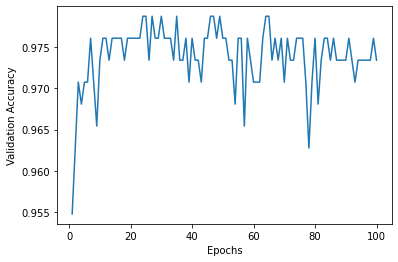

In [95]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

In [96]:
model = build_model()

In [97]:
model.fit(train_data, 
          train_targets, 
          epochs =  22, 
          batch_size = 64, 
          validation_data = (test_data, test_targets))

Epoch 1/22
6/6 [==============================] - 4s 149ms/step - loss: 1.2738 - binary_accuracy: 0.6907 - val_loss: 1.0437 - val_binary_accuracy: 0.9053
Epoch 2/22
6/6 [==============================] - 0s 29ms/step - loss: 1.0677 - binary_accuracy: 0.8207 - val_loss: 0.9263 - val_binary_accuracy: 0.9263
Epoch 3/22
6/6 [==============================] - 0s 76ms/step - loss: 0.9928 - binary_accuracy: 0.8657 - val_loss: 0.8518 - val_binary_accuracy: 0.9316
Epoch 4/22
6/6 [==============================] - 0s 75ms/step - loss: 0.9020 - binary_accuracy: 0.8810 - val_loss: 0.7982 - val_binary_accuracy: 0.9421
Epoch 5/22
6/6 [==============================] - 0s 29ms/step - loss: 0.8477 - binary_accuracy: 0.9113 - val_loss: 0.7568 - val_binary_accuracy: 0.9421
Epoch 6/22
6/6 [==============================] - 0s 51ms/step - loss: 0.7817 - binary_accuracy: 0.9502 - val_loss: 0.7253 - val_binary_accuracy: 0.9474
Epoch 7/22
6/6 [==============================] - 0s 35ms/step - loss: 0.7688 - b

In [98]:
results = model.evaluate(test_data, test_targets)

6/6 [==============================] - 0s 4ms/step - loss: 0.5251 - binary_accuracy: 0.9789


In [100]:
print("Accuracy: {}".format(results[1]))

Accuracy: 0.9789473414421082
